# Clustering

This file contains the different cluster methods.

In [1]:
from Surrogate_data import Surrogate_data

In [ ]:
evaluate = Surrogate_data()

# Expectation Maximization for Clustering

The Expectation Maximization algorithm (EM) is an Maximum Likelihood Estimator (MLE) (for a closer examination of the relationship between MLE, MAP and EM see [1]). Hence, it assume a Gaussian normal distribution of the data. The core idea of the EM is to iteratively approximate the latent values, viz. those values which are not given. Doing so, it is guranteed to converge to, at least a local, minimum.

We can make use of the `GaussianMixture` function from `sklearn` which implemented the EM algorithm.

In [2]:
from sklearn.mixture import GaussianMixture

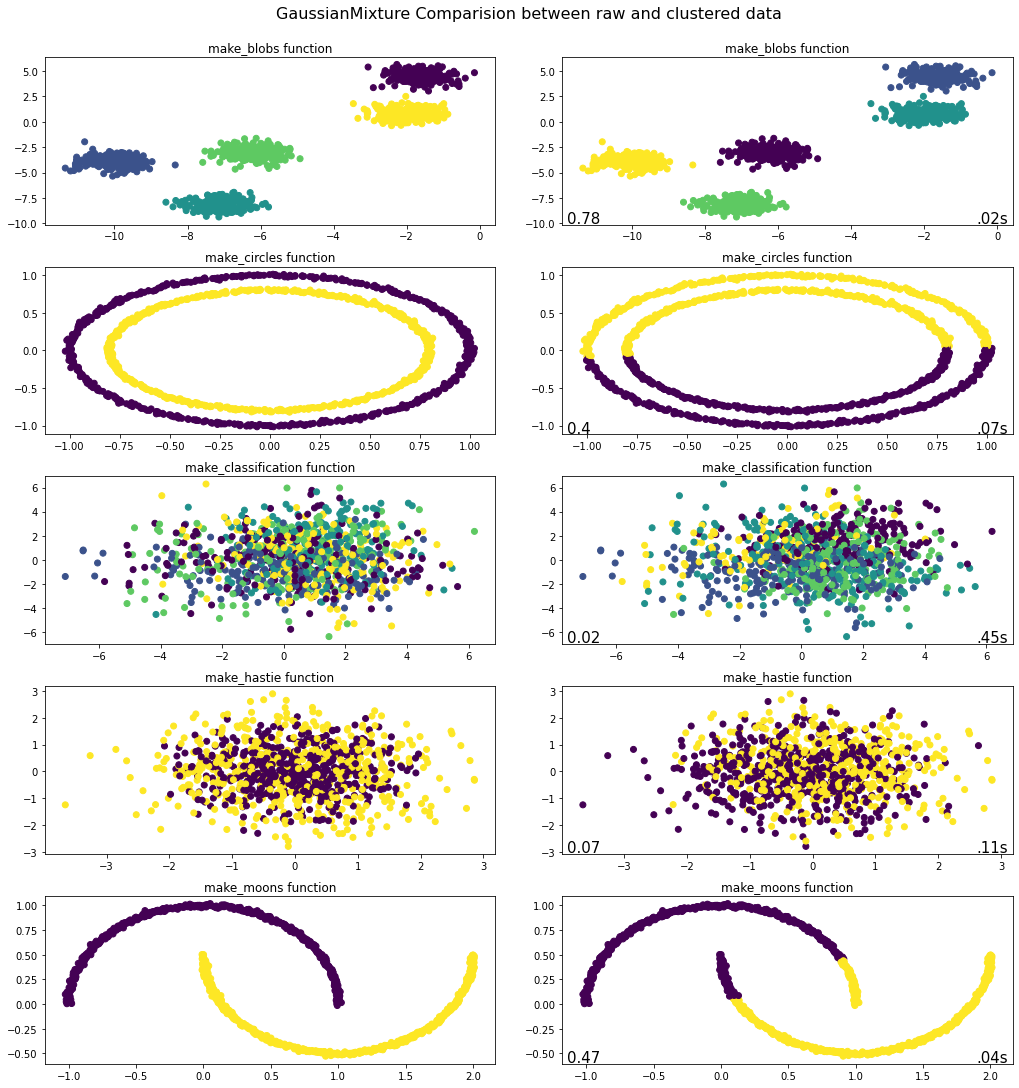

In [4]:
evaluate.plot_raw_vs_predict(GaussianMixture, init_params='kmeans', max_iter = 100)

# DBSCAN

In [5]:
from sklearn.cluster import DBSCAN

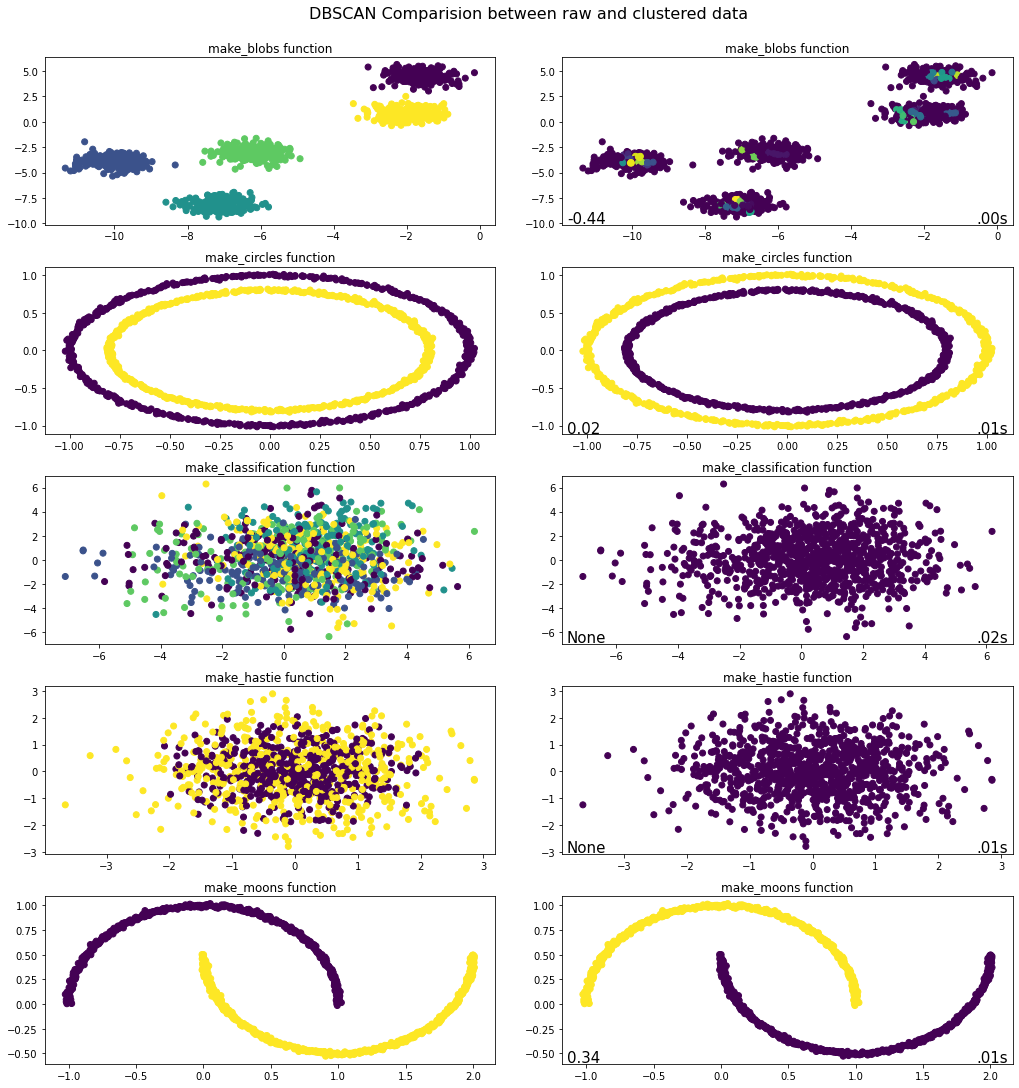

In [6]:
evaluate.plot_raw_vs_predict(DBSCAN, eps = 0.1)

# HDBSCAN

In [3]:
import hdbscan

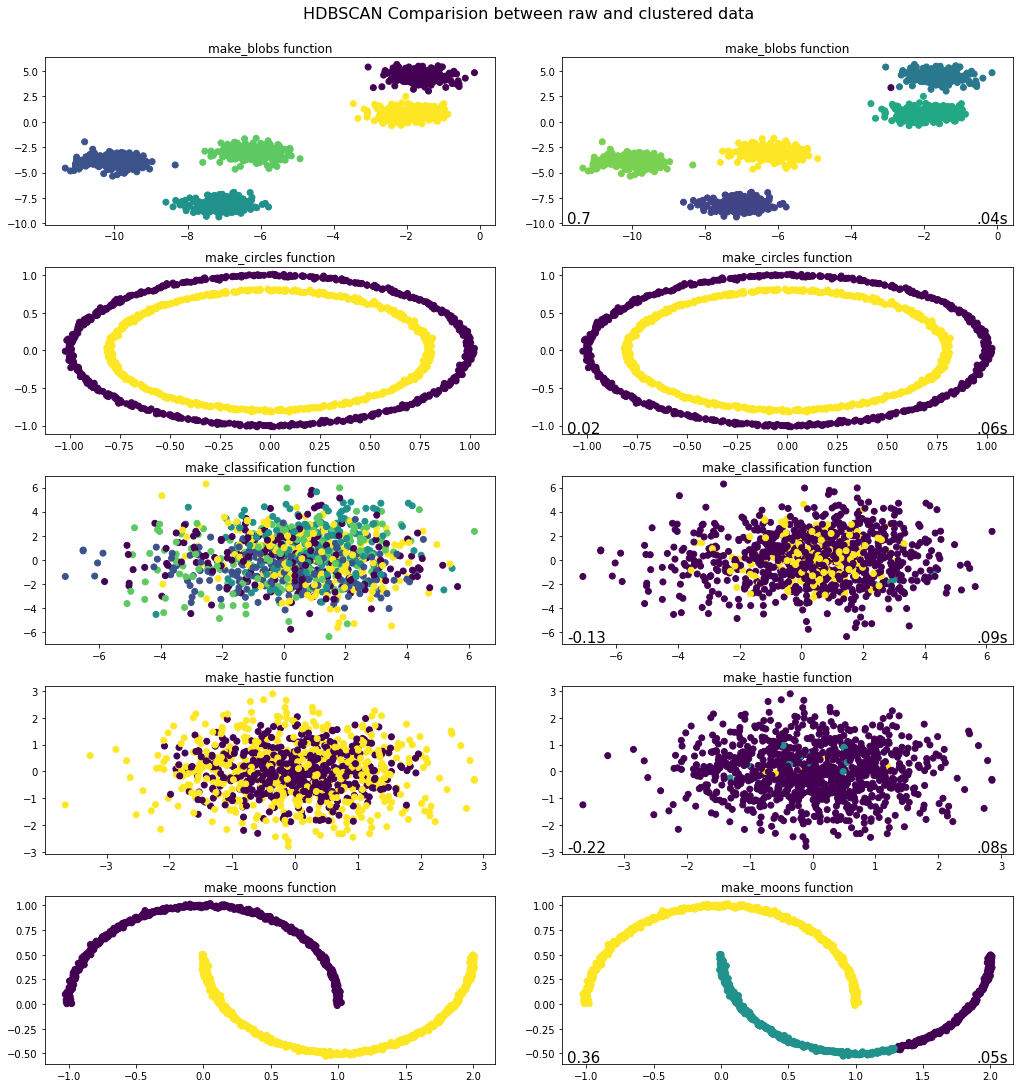

In [4]:
evaluate.plot_raw_vs_predict(hdbscan.HDBSCAN)

# Bibliography

[1] https://stats.stackexchange.com/questions/235070/relation-between-map-em-and-mle/524802#524802

*Note: An exhaustive blogpost which explains MLE, MAP and EM and their relationship.*